In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import math

In [3]:
dataset=pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [9]:

N = 10000  # rows
d = 10  # columns
sum_of_rewards = [0] * d
no_of_selections = [0] * d
ads_selected = []
total_rewards = 0
average_reward=0
for n in range(0, N):
    ad = 0
    max_ucb = 0
    for i in range(0, d):
        if no_of_selections[i] > 0:
            average_reward = sum_of_rewards[i] / no_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / no_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_ucb:
            max_ucb = upper_bound
            ad = i
    ads_selected.append(ad)
    no_of_selections[ad] = no_of_selections[ad] + 1
    reward=dataset.values[n,ad]
    sum_of_rewards[ad]=sum_of_rewards[ad]+average_reward
    total_rewards = total_rewards + reward

print("Total Rewards:", total_rewards)
print("Ads Selected:", ads_selected)

Total Rewards: 1249
Ads Selected: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,

Text(0, 0.5, 'no of times each ad was selected')

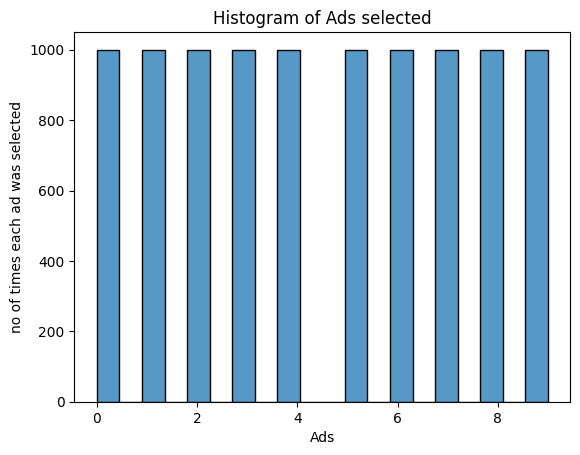

In [13]:
sns.histplot(ads_selected,kde=False,bins=20) #hist plot
plt.title('Histogram of Ads selected')
plt.xlabel('Ads')
plt.ylabel('no of times each ad was selected')

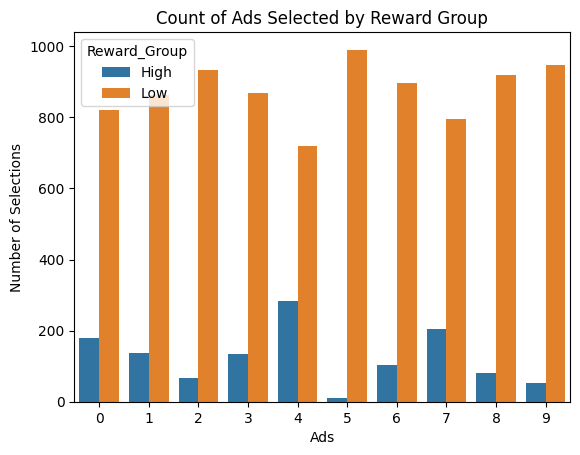

In [16]:
rewards = [dataset.values[i, ads_selected[i]] for i in range(N)]
dataset_with_ads = pd.DataFrame({'Ads': ads_selected, 'Reward_Group': ['High' if r > 0 else 'Low' for r in rewards]})
sns.countplot(x='Ads', data=dataset_with_ads, hue='Reward_Group')
plt.title('Count of Ads Selected by Reward Group')
plt.xlabel('Ads')
plt.ylabel('Number of Selections')
plt.show()